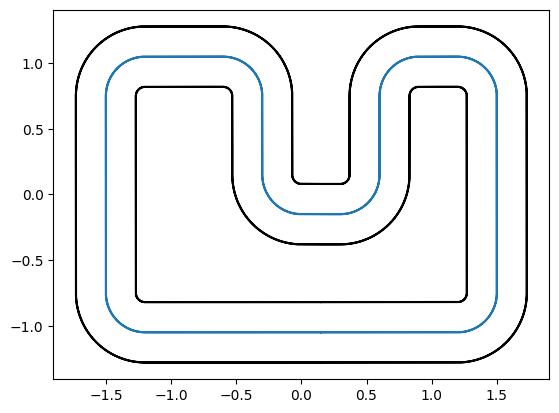

In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt

with open('/home/robin/Dev/mpcc_python/DEMO_TRACK.yaml') as stream:
    data = yaml.safe_load(stream)

half_track_width = 0.46/2

zvars = ['f_posx', 'f_posy', 'f_phi', 'f_vx', 'f_vy', 'f_omega', 'f_d', 'f_delta', 'f_theta',
                's_posx', 's_posy', 's_phi', 's_vx', 's_vy', 's_omega', 's_d', 's_delta', 's_theta',
                'f_ddot', 'f_deltadot', 'f_thetadot',
                's_ddot', 's_deltadot', 's_thetadot']

track = data['track']
xtrack = track['xCoords']
xrate = track['xRate']
ytrack = track['yCoords']
yrate = track['yRate']
arcLength = track['arcLength']
tangentAngle = track['tangentAngle']

np_xtrack = np.array(xtrack)
np_xrate = np.array(xrate)
np_ytrack = np.array(ytrack)
np_yrate = np.array(yrate)

plt.plot(np_xtrack, np_ytrack)
plt.plot(np_xtrack+half_track_width*np_yrate,np_ytrack-half_track_width*np_xrate,'black');
plt.plot(np_xtrack-half_track_width*np_yrate,np_ytrack+half_track_width*np_xrate,'black');

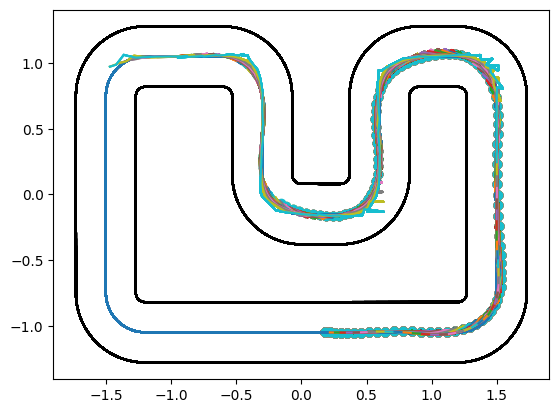

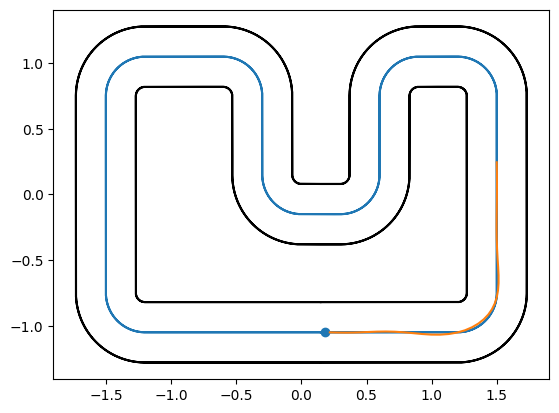

In [4]:
import pickle
from matplotlib.animation import FuncAnimation


with open('log_data.pickle', 'rb') as f:
    loaded_obj = pickle.load(f)

z_output = loaded_obj['z_output']
x_axes = np.array(range(len(z_output)))
x = []
y = []
hor_x = []
hor_y = []

for idx, z in enumerate(z_output):
    x.append(z[0,0])
    y.append(z[0,1])
    hor_x.append(z[1:,0])
    hor_y.append(z[1:,1])

    plt.plot(np_xtrack, np_ytrack)
    plt.plot(np_xtrack+half_track_width*np_yrate,np_ytrack-half_track_width*np_xrate,'black');
    plt.plot(np_xtrack-half_track_width*np_yrate,np_ytrack+half_track_width*np_xrate,'black');
    plt.scatter(x,y)
    plt.plot(np.array(hor_x), np.array(hor_y))
    # plt.pause(0.1)

fig, ax = plt.subplots(1, 1)

def animate_s(i):
    ax.clear()
    ax.plot()
    plt.plot(np_xtrack, np_ytrack)
    plt.plot(np_xtrack+half_track_width*np_yrate,np_ytrack-half_track_width*np_xrate,'black');
    plt.plot(np_xtrack-half_track_width*np_yrate,np_ytrack+half_track_width*np_xrate,'black');
    plt.scatter(x[i],y[i])
    plt.plot(np.array(hor_x[i]), np.array(hor_y[i]))
ani = FuncAnimation(fig, animate_s, frames=len(x),
                    interval=20, repeat=False)
from matplotlib.animation import PillowWriter
# Save the animation as an animated GIF
ani.save("simple_animation.gif", dpi=100,
         writer=PillowWriter(fps=20))

/tmp/ipykernel_6279/1398915616.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


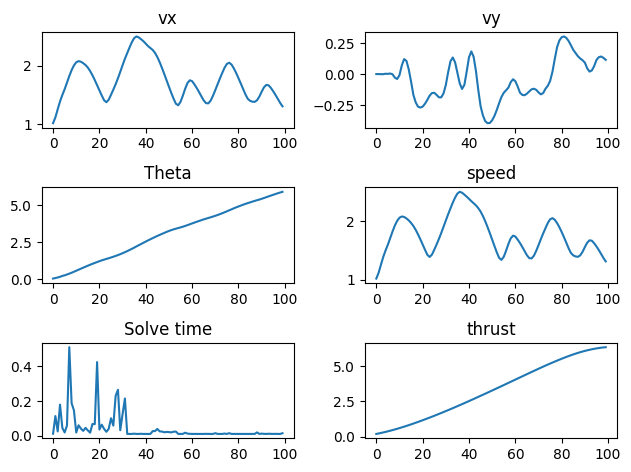

In [5]:
with open('log_data.pickle', 'rb') as f:
    loaded_obj = pickle.load(f)
    
log_info = loaded_obj['log_info']

vx = []
vy = []
v = []
theta = []
thrust = []
steering_input = []
solve_time = []
for idx, z in enumerate(z_output):
    vx.append(z[0,3])
    vy.append(z[0,4])
    v.append(np.sqrt(z[0,4]*z[0,4] + z[0,3]*z[0,3]))
    thrust.append(z[0,9])
    solve_time.append(log_info[idx])
    theta.append(z[0,8])

n_states = len(vx)
x_axes = np.array(range(n_states))
fig, axs = plt.subplots(3, 2)

axs[0,0].plot(x_axes, np.array(vx))
axs[0,0].set_title('vx')
axs[0,1].plot(x_axes, np.array(vy))
axs[0,1].set_title('vy')
axs[1,0].plot(x_axes, np.array(theta))
axs[1,0].set_title('Theta')
axs[1,1].plot(x_axes, np.array(v))
axs[1,1].set_title('speed')
axs[2,0].plot(x_axes, np.array(solve_time))
axs[2,0].set_title('Solve time')
axs[2,1].plot(x_axes, np.array(thrust))
axs[2,1].set_title('thrust')

fig.tight_layout(pad=1.0)
fig.savefig('log_data.png')
fig.show()









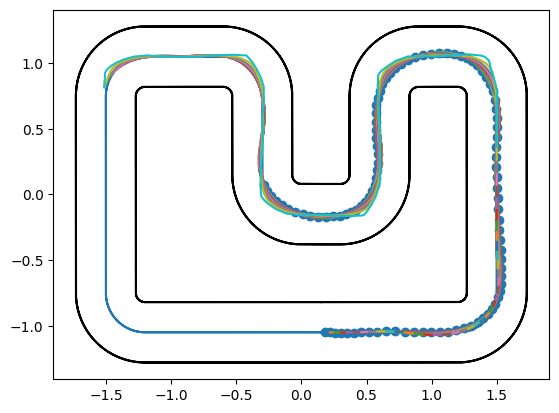

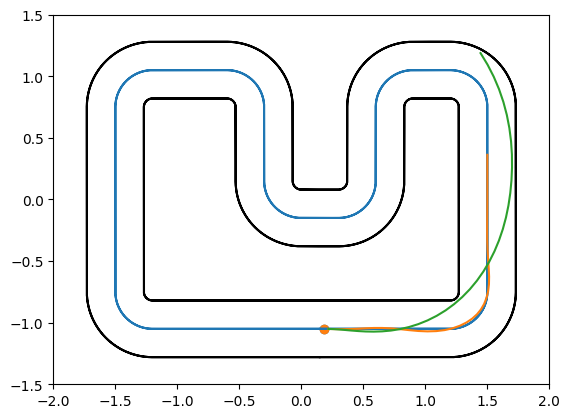

In [2]:
import pickle
import yaml
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

zvars = ['f_posx', 'f_posy', 'f_phi', 'f_vx', 'f_vy', 'f_omega', 'f_d', 'f_delta', 'f_theta',
         's_posx', 's_posy', 's_phi', 's_vx', 's_vy', 's_omega', 's_d', 's_delta', 's_theta',
         'f_ddot', 'f_deltadot', 'f_thetadot',
         's_ddot', 's_deltadot', 's_thetadot']



with open('log_data.pickle', 'rb') as f:
    loaded_obj = pickle.load(f)

z_output = loaded_obj['z_output']
x_axes = np.array(range(len(z_output)))
f_x = []
f_y = []
hor_f_x = []
hor_f_y = []
s_x = []
s_y = []
hor_s_x = []
hor_s_y = []
for idx, z in enumerate(z_output):
    f_x.append(z[0,zvars.index('f_posx')])
    f_y.append(z[0,zvars.index('f_posy')])
    hor_f_x.append(z[1:,zvars.index('f_posx')])
    hor_f_y.append(z[1:,zvars.index('f_posy')])
    s_x.append(z[0,zvars.index('s_posx')])
    s_y.append(z[0,zvars.index('s_posy')])
    hor_s_x.append(z[1:,zvars.index('s_posx')])
    hor_s_y.append(z[1:,zvars.index('s_posy')])

plt.plot(np_xtrack, np_ytrack)
plt.plot(np_xtrack+half_track_width*np_yrate,np_ytrack-half_track_width*np_xrate,'black');
plt.plot(np_xtrack-half_track_width*np_yrate,np_ytrack+half_track_width*np_xrate,'black');
plt.scatter(f_x,f_y)
plt.plot(np.array(hor_f_x), np.array(hor_f_y))

# plt.scatter(s_x,s_y)
# plt.plot(np.array(hor_s_x), np.array(hor_s_y))
    # plt.pause(0.1)

fig, ax = plt.subplots(1, 1)

def animate_s(i):
    ax.clear()
    ax.plot()
    plt.xlim([-2, 2])
    plt.ylim([-1.5, 1.5])
    plt.plot(np_xtrack, np_ytrack)
    plt.plot(np_xtrack+half_track_width*np_yrate,np_ytrack-half_track_width*np_xrate,'black');
    plt.plot(np_xtrack-half_track_width*np_yrate,np_ytrack+half_track_width*np_xrate,'black');
    plt.scatter(f_x[i],f_y[i])
    plt.plot(np.array(hor_f_x[i]), np.array(hor_f_y[i]))
    plt.scatter(s_x[i],s_y[i])
    plt.plot(np.array(hor_s_x[i]), np.array(hor_s_y[i]))

ani = FuncAnimation(fig, animate_s, frames=len(f_x),
                    interval=20, repeat=False)
from matplotlib.animation import PillowWriter
# Save the animation as an animated GIF
ani.save("simple_animation_wo_terminal.gif", dpi=100,
         writer=PillowWriter(fps=20))

